In [2]:
from google.colab import files
uploaded=files.upload()

Saving insurance.csv to insurance.csv


In [3]:
uploaded

{'insurance.csv': b'age,sex,bmi,children,smoker,region,expenses\r19,female,27.9,0,yes,southwest,16884.92\r18,male,33.8,1,no,southeast,1725.55\r28,male,33.0,3,no,southeast,4449.46\r33,male,22.7,0,no,northwest,21984.47\r32,male,28.9,0,no,northwest,3866.86\r31,female,25.7,0,no,southeast,3756.62\r46,female,33.4,1,no,southeast,8240.59\r37,female,27.7,3,no,northwest,7281.51\r37,male,29.8,2,no,northeast,6406.41\r60,female,25.8,0,no,northwest,28923.14\r25,male,26.2,0,no,northeast,2721.32\r62,female,26.3,0,yes,southeast,27808.73\r23,male,34.4,0,no,southwest,1826.84\r56,female,39.8,0,no,southeast,11090.72\r27,male,42.1,0,yes,southeast,39611.76\r19,male,24.6,1,no,southwest,1837.24\r52,female,30.8,1,no,northeast,10797.34\r23,male,23.8,0,no,northeast,2395.17\r56,male,40.3,0,no,southwest,10602.39\r30,male,35.3,0,yes,southwest,36837.47\r60,female,36.0,0,no,northeast,13228.85\r30,female,32.4,1,no,southwest,4149.74\r18,male,34.1,0,no,southeast,1137.01\r34,female,31.9,1,yes,northeast,37701.88\r37,male,2

In [56]:
%reload_ext rpy2.ipython

/usr/local/lib/python3.6/dist-packages/rpy2/robjects/pandas2ri.py:14: FutureWarning: pandas.core.index is deprecated and will be removed in a future version.  The public classes are available in the top-level namespace.
  from pandas.core.index import Index as PandasIndex
/usr/local/lib/python3.6/dist-packages/rpy2/robjects/pandas2ri.py:34: UserWarning: pandas >= 1.0 is not supported.
  warnings.warn('pandas >= 1.0 is not supported.')


In [58]:
%%R
library(readr) #read in the data
library(ggplot2)
#install.packages("ggplot2")
#install.packages("corrplot")
#install.packages("ggcorrplot")
library(corrplot) #visualization of correlation
library(ggcorrplot) #visualization of correlation
library(reshape2) #melt function
library(dplyr) #used for data transformations
library(tidyverse) #used for data transformations
insurance <- read_csv(file = "insurance.csv")

R[write to console]: 
── Column specification ────────────────────────────────────────────────────────
cols(
  age = col_double(),
  sex = col_character(),
  bmi = col_double(),
  children = col_double(),
  smoker = col_character(),
  region = col_character(),
  expenses = col_double()
)




In [59]:
%%R
summary(insurance)

      age            sex                 bmi           children    
 Min.   :18.00   Length:1338        Min.   :16.00   Min.   :0.000  
 1st Qu.:27.00   Class :character   1st Qu.:26.30   1st Qu.:0.000  
 Median :39.00   Mode  :character   Median :30.40   Median :1.000  
 Mean   :39.21                      Mean   :30.67   Mean   :1.095  
 3rd Qu.:51.00                      3rd Qu.:34.70   3rd Qu.:2.000  
 Max.   :64.00                      Max.   :53.10   Max.   :5.000  
    smoker             region             expenses    
 Length:1338        Length:1338        Min.   : 1122  
 Class :character   Class :character   1st Qu.: 4740  
 Mode  :character   Mode  :character   Median : 9382  
                                       Mean   :13270  
                                       3rd Qu.:16640  
                                       Max.   :63770  


R[write to console]: Using sex, smoker as id variables



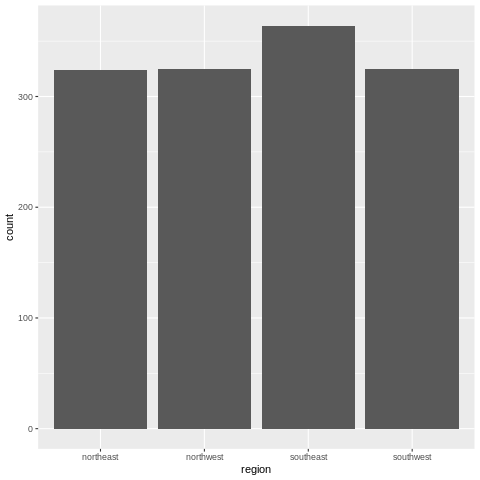

In [60]:
%%R
ggplot(data = melt(insurance[, -6]), mapping = aes(x = value)) + 
  geom_histogram(bins = 10) + facet_wrap(~variable, scales = "free_x")

ggplot(data = insurance) +
geom_bar(mapping = aes(x = as.factor(sex)))

ggplot(data = insurance) + 
geom_bar(mapping = aes(x = smoker))

ggplot(data = insurance) + 
geom_bar(mapping = aes(x= region))

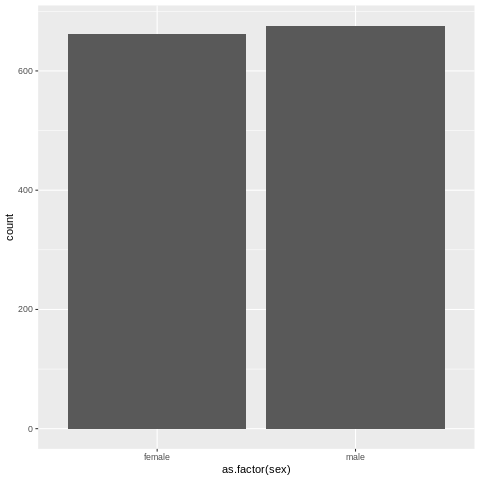

In [61]:
%%R
ggplot(data = insurance) +
geom_bar(mapping = aes(x = as.factor(sex)))

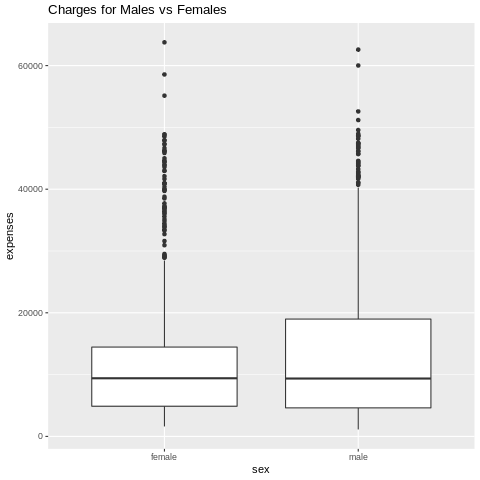

In [75]:
%%R
insurance %>%
ggplot(aes(x=smoker, y = expenses)) +
geom_boxplot() +
ggtitle("Charges for Smokers vs Non-Smokers")






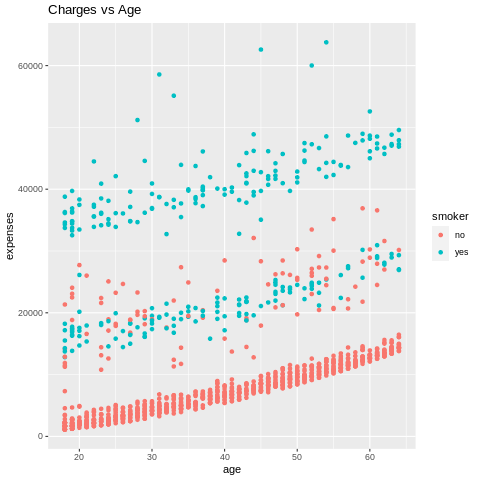

In [76]:
%%R
insurance %>%
ggplot(aes(x=age, y = expenses)) + 
  geom_point(aes(color = smoker)) +
  ggtitle("Charges vs Age")


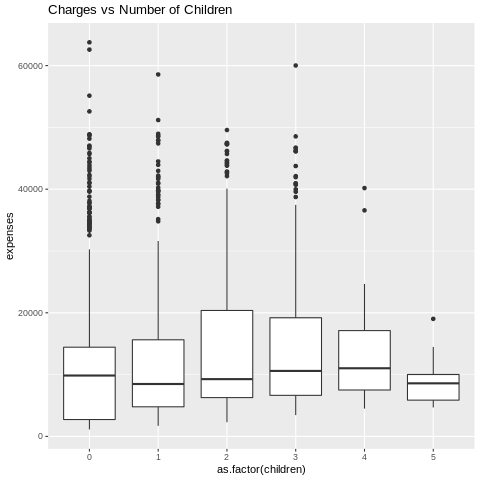

In [77]:
%%R
insurance %>%
ggplot(aes(x=as.factor(children), y = expenses)) + 
  geom_boxplot() +
  ggtitle("Charges vs Number of Children")

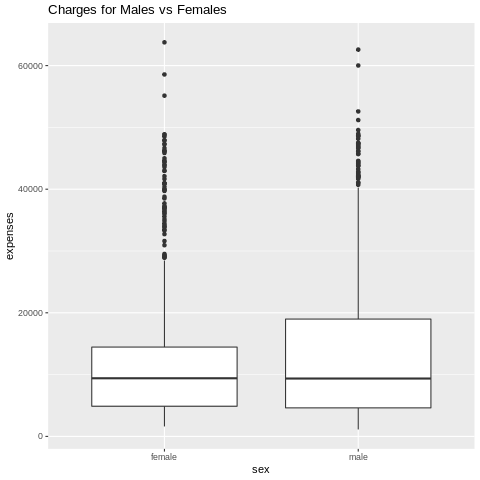

In [78]:
%%R
insurance %>%
ggplot(aes(x= sex, y = expenses)) + 
  geom_boxplot() +
  ggtitle("Charges for Males vs Females")

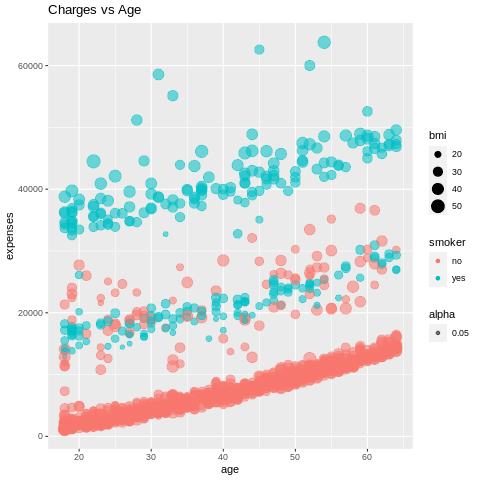

In [79]:
%%R
insurance %>%
ggplot(aes(x=age, y = expenses)) + 
  geom_point(aes(color = smoker, size = bmi, alpha = .05)) + 
  ggtitle("Charges vs Age")

In [80]:
%%R
insurance <- insurance %>%
mutate(obese = ifelse(bmi >= 30, "yes", "no"))
head(insurance)
averageCharges <- insurance %>%
  group_by(smoker, obese) %>%
  summarise(
    count = n(),
    average_charge = mean(expenses, na.rm = TRUE), 
    stdev_charge = sd(expenses, na.rm = TRUE)
  )
print(averageCharges)

R[write to console]: `summarise()` regrouping output by 'smoker' (override with `.groups` argument)



# A tibble: 4 x 5
# Groups:   smoker [2]
  smoker obese count average_charge stdev_charge
  <chr>  <chr> <int>          <dbl>        <dbl>
1 no     no      502          7977.        5839.
2 no     yes     562          8843.        6105.
3 yes    no      129         21363.        5067.
4 yes    yes     145         41558.        6031.


In [82]:
%%R
insurance$obese <- as.factor(insurance$obese)
insurance$smoker <- as.factor(insurance$smoker)
insurance$sex <- as.factor(insurance$sex)
insurance$region <- as.factor(insurance$region)

set.seed(134) #set seed to make reproducible 
sampleSize <- floor(.75*nrow(insurance))
trainIndexes <- sample(seq_len(nrow(insurance)), sampleSize, replace = FALSE) 
train <- insurance[trainIndexes, ]
test <- insurance[-trainIndexes, ]

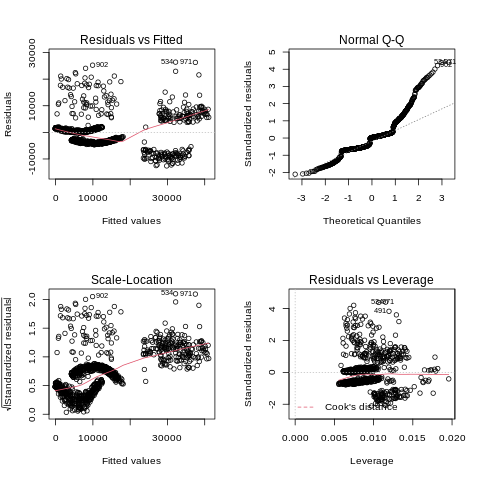

In [84]:
%%R
par(mfrow = c(2,2))
lm.fit.m.1 <- lm(expenses ~ . - bmi, data = train)
summary(lm.fit.m.1)
plot(lm.fit.m.1)

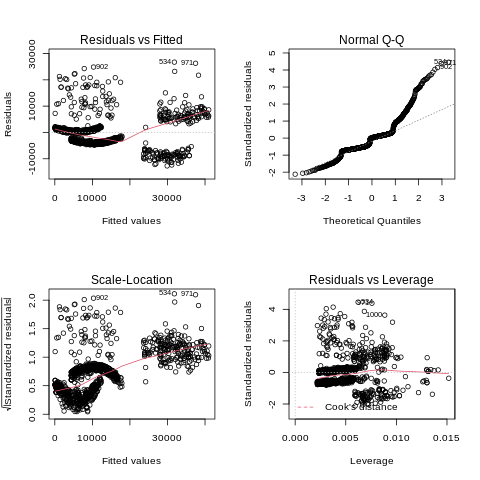

In [88]:
%%R
par(mfrow = c(2,2))
lm.fit.m.2 <- lm(expenses ~ . - bmi - sex - region, data = train)
summary(lm.fit.m.2)
plot(lm.fit.m.2)

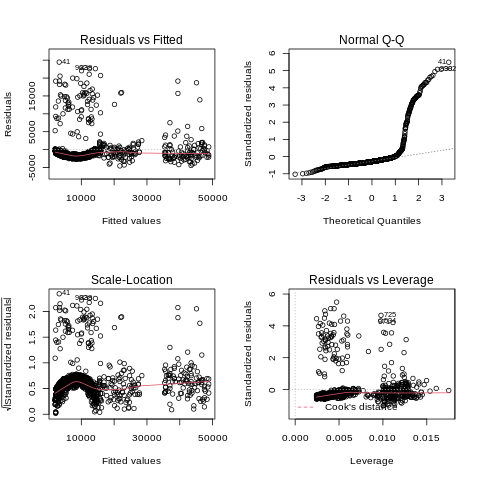

In [90]:
%%R
par(mfrow = c(2,2))
lm.fit.m.3 <- lm(expenses ~ obese*smoker + age + children, data = train)
summary(lm.fit.m.3) #Due to the hierarchy principal, even though obeseyes is insignificant, we must leave the coefficient in because the interaction term is significant 
plot(lm.fit.m.3)

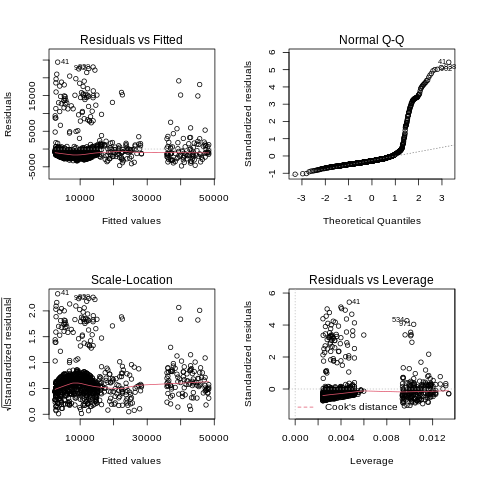

In [91]:
%%R
par(mfrow = c(2,2))
lm.fit.m.4 <- lm(expenses ~ obese*smoker + age, data = train)
summary(lm.fit.m.4) 
plot(lm.fit.m.4)

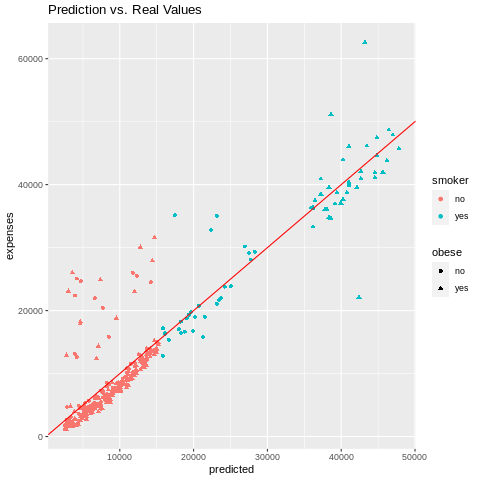

In [92]:
%%R
test$predicted <- predict(lm.fit.m.4, newdata = test)
test %>%
  ggplot() +
  geom_point(aes(x = predicted, y = expenses, color = smoker, shape = obese)) +
  geom_abline(color = "red") +
  ggtitle("Prediction vs. Real Values")

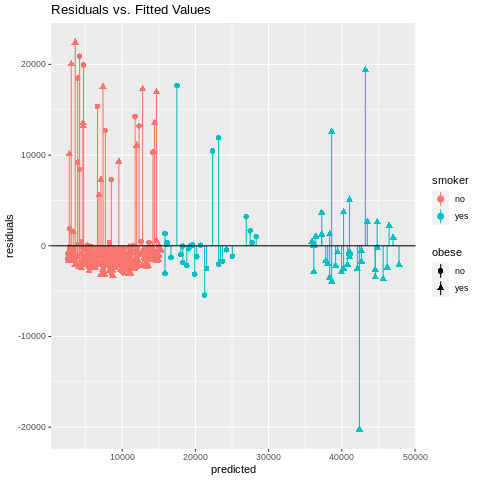

In [93]:
%%R
test$residuals <- test$expenses - test$predicted

#plot residuals 
test %>%
  ggplot() +
  geom_pointrange(aes(x=predicted, y=residuals, ymin = 0, ymax = residuals, color = smoker, shape = obese)) +
  geom_hline(yintercept = 0) +
ggtitle("Residuals vs. Fitted Values")